## Importer les librairies 

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    f1_score
)


## EDA

In [228]:
#Charger les donn√©es
df = pd.read_csv("Dataset_Abandon_Scolaire.csv")

In [229]:
df.head()

Age   Sexe  Taux_presence  Nombre_retards  Note_moyenne  \
0   21  Femme      89.585023               2     15.826896   
1   20  Homme      70.713068               3     12.829358   
2   22  Femme      82.122963               1     13.086319   
3   24  Homme      87.408859               3     14.992032   
4   20  Homme      86.470676               3     12.671649   

  Situation_familiale  Abandon  
0    Enfants √† charge        0  
1         C√©libataire        0  
2    Enfants √† charge        0  
3         C√©libataire        0  
4               Mari√©        0

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2000 non-null   int64  
 1   Sexe                 2000 non-null   object 
 2   Taux_presence        2000 non-null   float64
 3   Nombre_retards       2000 non-null   int64  
 4   Note_moyenne         2000 non-null   float64
 5   Situation_familiale  2000 non-null   object 
 6   Abandon              2000 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 109.5+ KB


In [231]:
df.isnull().sum()

Age                    0
Sexe                   0
Taux_presence          0
Nombre_retards         0
Note_moyenne           0
Situation_familiale    0
Abandon                0
dtype: int64

On remarque qu'on a pas de valeur manquantes sur notre jeu de donn√©es. 

In [232]:
df.describe()

Age  Taux_presence  Nombre_retards  Note_moyenne      Abandon
count  2000.0000    2000.000000     2000.000000   2000.000000  2000.000000
mean     20.5930      84.637016        2.593500     13.441019     0.084000
std       2.0133       7.921973        1.788255      1.809283     0.277457
min      14.0000      59.586369        0.000000      7.615012     0.000000
25%      19.0000      79.279829        1.000000     12.268147     0.000000
50%      21.0000      84.813868        3.000000     13.470242     0.000000
75%      22.0000      90.169016        4.000000     14.688037     0.000000
max      28.0000     100.000000        9.000000     18.833574     1.000000

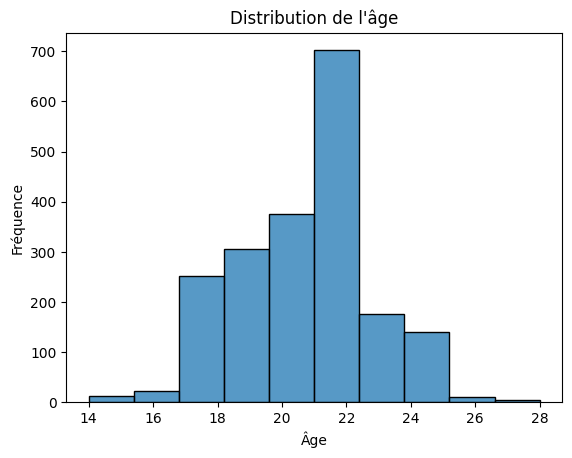

In [233]:
#la distribution de l'√¢ge
sns.histplot(df['Age'], bins=10, kde=False)
plt.title("Distribution de l'√¢ge")
plt.xlabel("√Çge")
plt.ylabel("Fr√©quence")
plt.show()

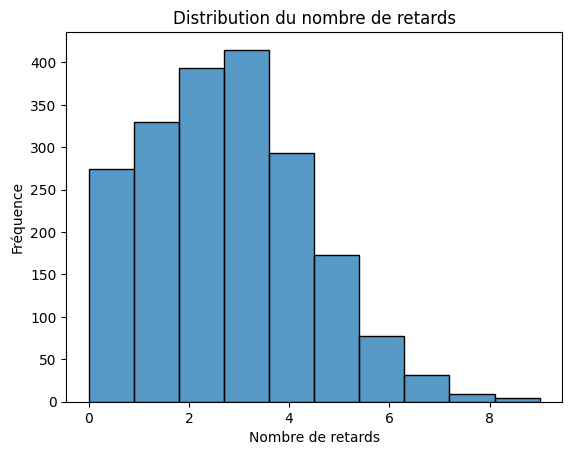

In [234]:
#la distribution du nombre de retards
sns.histplot(df['Nombre_retards'], bins=10, kde=False)
plt.title("Distribution du nombre de retards")
plt.xlabel("Nombre de retards")
plt.ylabel("Fr√©quence")
plt.show()

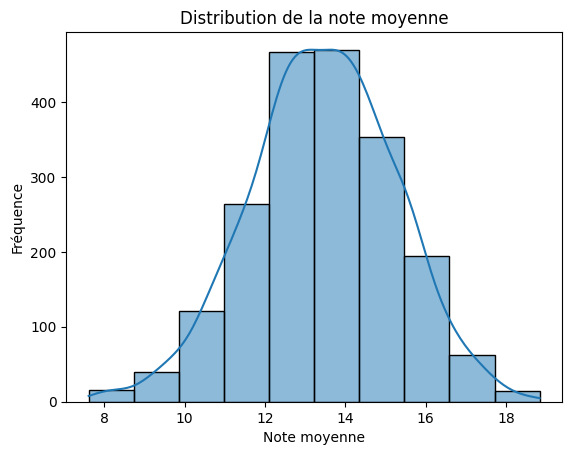

In [235]:
#La distribution de la note moyenne
sns.histplot(df['Note_moyenne'], bins=10, kde=True)
plt.title("Distribution de la note moyenne")
plt.xlabel("Note moyenne")
plt.ylabel("Fr√©quence")
plt.show()

<Axes: xlabel='Sexe'>

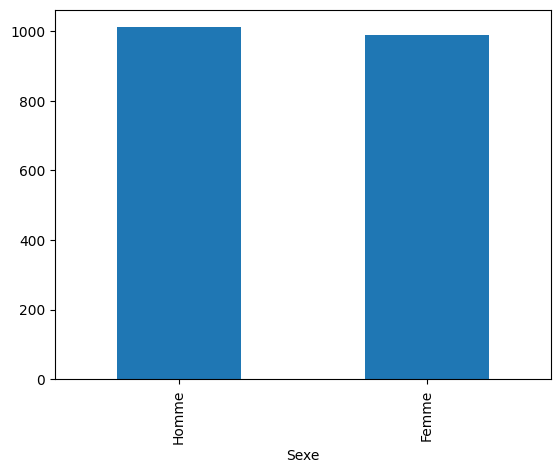

In [236]:
#La distribution du sexe
df.Sexe.value_counts().plot(kind='bar')

In [237]:
df.Situation_familiale.unique()

array(['Enfants √† charge', 'C√©libataire', 'Mari√©', 'Divorc√©'],
      dtype=object)

<Axes: xlabel='Situation_familiale'>

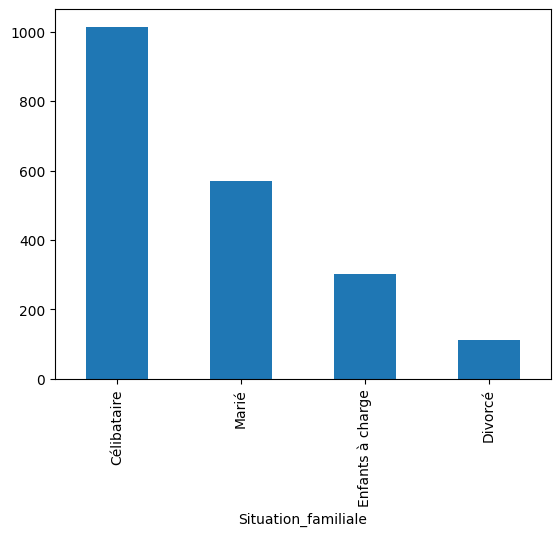

In [238]:
df.Situation_familiale.value_counts().plot(kind='bar')

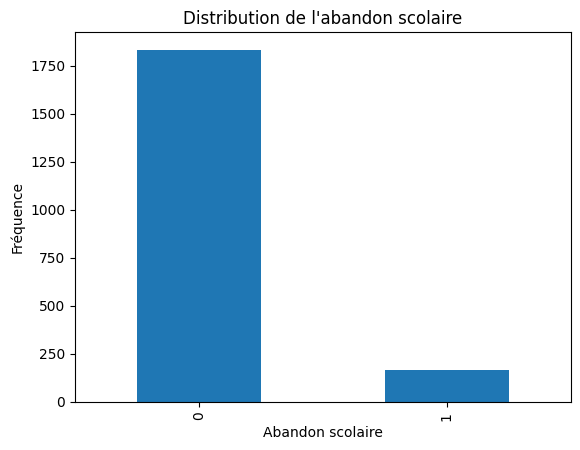

In [239]:
#La distribution de l'abandon
df.Abandon.value_counts().plot(kind='bar')
plt.title("Distribution de l'abandon scolaire")
plt.xlabel("Abandon scolaire")
plt.ylabel("Fr√©quence")
plt.show()

### R√©sum√© des donn√©es

On a 2000 √©tudiants dans ce jeu de donn√©es.

- **√Çge** : la moyenne est de 20,6 ans. La plupart ont entre 19 et 22 ans.
- **Taux de pr√©sence** : en moyenne 84,6 %. La majorit√© des √©tudiants sont souvent pr√©sents.
- **Nombre de retards** : en moyenne 2 √† 3 retards par √©tudiant. Certains n‚Äôen ont aucun, d‚Äôautres jusqu‚Äô√† 9.
- **Note moyenne** : environ 13,4 /20. Les notes sont bonnes en g√©n√©ral.
- **Abandon** : 8,4 % des √©tudiants abandonnent. La majorit√© reste.

### Conclusion
Les √©tudiants sont jeunes, pr√©sents en cours, avec de bonnes notes et peu d‚Äôabandons.

### Normalisation et encodage 

In [240]:
df_normalized = df.copy()

In [241]:
# Encoder la colonne Sexe
label_encoder = LabelEncoder()
df_normalized['Sexe'] = label_encoder.fit_transform(df_normalized['Sexe'])

In [ ]:
from sentence_transformers import SentenceTransformer


# Charger le mod√®le CamemBERT
model =  SentenceTransformer("dangvantuan/sentence-camembert-base")

# Encoder la colonne Situation_familiale
situation_familiale_embeddings = model.encode(df_normalized['Situation_familiale'].tolist())

# Ajouter les embeddings au DataFrame
for i in range(situation_familiale_embeddings.shape[1]):
    df_normalized[f'Situation_familiale_emb_{i}'] = situation_familiale_embeddings[:, i]

In [243]:
df_normalized.head()

Age  Sexe  Taux_presence  Nombre_retards  Note_moyenne Situation_familiale  \
0   21     0      89.585023               2     15.826896    Enfants √† charge   
1   20     1      70.713068               3     12.829358         C√©libataire   
2   22     0      82.122963               1     13.086319    Enfants √† charge   
3   24     1      87.408859               3     14.992032         C√©libataire   
4   20     1      86.470676               3     12.671649               Mari√©   

   Abandon  Situation_familiale_emb_0  Situation_familiale_emb_1  \
0        0                   0.036014                   0.076774   
1        0                  -0.133212                   0.069986   
2        0                   0.036014                   0.076774   
3        0                  -0.133212                   0.069986   
4        0                  -0.070635                   0.128800   

   Situation_familiale_emb_2  ...  Situation_familiale_emb_758  \
0                   0.044001  ...                    -0.018565   
1                   0.067941  ...                     0.017424   
2                   0.044001  ...                    -0.018565   
3                   0.067941  ...                     0.017424   
4                   0.048252  ...                    -0.020175   

   Situation_familiale_emb_759  Situation_familiale_emb_760  \
0                     0.053275                     0.127430   
1                    -0.136768                    -0.051657   
2                     0.053275                     0.127430   
3                    -0.136768                    -0.051657   
4                    -0.083246                    -0.057411   

   Situation_familiale_emb_761  Situation_familiale_emb_762  \
0                     0.018776                     0.104706   
1                     0.162619                    -0.114968   
2                     0.018776                     0.104706   
3                     0.162619                    -0.114968   
4                     0.148595                    -0.066943   

   Situation_familiale_emb_763  Situation_familiale_emb_764  \
0                     0.058765                    -0.093332   
1                     0.084216                     0.053738   
2                     0.058765                    -0.093332   
3                     0.084216                     0.053738   
4                     0.091293                    -0.031461   

   Situation_familiale_emb_765  Situation_familiale_emb_766  \
0                     0.035901                    -0.105496   
1                     0.103432                     0.126132   
2                     0.035901                    -0.105496   
3                     0.103432                     0.126132   
4                     0.132042                     0.104782   

   Situation_familiale_emb_767  
0                     0.310760  
1                     0.319013  
2                     0.310760  
3                     0.319013  
4                     0.196624  

[5 rows x 775 columns]

In [246]:
#Supprimer la colonne Situation_familiale
df_normalized.drop(columns=['Situation_familiale'], inplace=True)

In [247]:
df_normalized.head()

Age  Sexe  Taux_presence  Nombre_retards  Note_moyenne  Abandon  \
0   21     0      89.585023               2     15.826896        0   
1   20     1      70.713068               3     12.829358        0   
2   22     0      82.122963               1     13.086319        0   
3   24     1      87.408859               3     14.992032        0   
4   20     1      86.470676               3     12.671649        0   

   Situation_familiale_emb_0  Situation_familiale_emb_1  \
0                   0.036014                   0.076774   
1                  -0.133212                   0.069986   
2                   0.036014                   0.076774   
3                  -0.133212                   0.069986   
4                  -0.070635                   0.128800   

   Situation_familiale_emb_2  Situation_familiale_emb_3  ...  \
0                   0.044001                   0.068476  ...   
1                   0.067941                  -0.048096  ...   
2                   0.044001                   0.068476  ...   
3                   0.067941                  -0.048096  ...   
4                   0.048252                  -0.094971  ...   

   Situation_familiale_emb_758  Situation_familiale_emb_759  \
0                    -0.018565                     0.053275   
1                     0.017424                    -0.136768   
2                    -0.018565                     0.053275   
3                     0.017424                    -0.136768   
4                    -0.020175                    -0.083246   

   Situation_familiale_emb_760  Situation_familiale_emb_761  \
0                     0.127430                     0.018776   
1                    -0.051657                     0.162619   
2                     0.127430                     0.018776   
3                    -0.051657                     0.162619   
4                    -0.057411                     0.148595   

   Situation_familiale_emb_762  Situation_familiale_emb_763  \
0                     0.104706                     0.058765   
1                    -0.114968                     0.084216   
2                     0.104706                     0.058765   
3                    -0.114968                     0.084216   
4                    -0.066943                     0.091293   

   Situation_familiale_emb_764  Situation_familiale_emb_765  \
0                    -0.093332                     0.035901   
1                     0.053738                     0.103432   
2                    -0.093332                     0.035901   
3                     0.053738                     0.103432   
4                    -0.031461                     0.132042   

   Situation_familiale_emb_766  Situation_familiale_emb_767  
0                    -0.105496                     0.310760  
1                     0.126132                     0.319013  
2                    -0.105496                     0.310760  
3                     0.126132                     0.319013  
4                     0.104782                     0.196624  

[5 rows x 774 columns]

In [248]:
# Normaliser les autres variables
scaler = StandardScaler()
columns_to_normalize = ['Age', 'Taux_presence', 'Nombre_retards', 'Note_moyenne']
df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])

In [249]:
df_normalized.head()

Age  Sexe  Taux_presence  Nombre_retards  Note_moyenne  Abandon  \
0  0.202206     0       0.624749       -0.331971      1.319016        0   
1 -0.294615     1      -1.758076        0.227373     -0.338153        0   
2  0.699027     0      -0.317431       -0.891315     -0.196094        0   
3  1.692670     1       0.349980        0.227373      0.857467        0   
4 -0.294615     1       0.231523        0.227373     -0.425342        0   

   Situation_familiale_emb_0  Situation_familiale_emb_1  \
0                   0.036014                   0.076774   
1                  -0.133212                   0.069986   
2                   0.036014                   0.076774   
3                  -0.133212                   0.069986   
4                  -0.070635                   0.128800   

   Situation_familiale_emb_2  Situation_familiale_emb_3  ...  \
0                   0.044001                   0.068476  ...   
1                   0.067941                  -0.048096  ...   
2                   0.044001                   0.068476  ...   
3                   0.067941                  -0.048096  ...   
4                   0.048252                  -0.094971  ...   

   Situation_familiale_emb_758  Situation_familiale_emb_759  \
0                    -0.018565                     0.053275   
1                     0.017424                    -0.136768   
2                    -0.018565                     0.053275   
3                     0.017424                    -0.136768   
4                    -0.020175                    -0.083246   

   Situation_familiale_emb_760  Situation_familiale_emb_761  \
0                     0.127430                     0.018776   
1                    -0.051657                     0.162619   
2                     0.127430                     0.018776   
3                    -0.051657                     0.162619   
4                    -0.057411                     0.148595   

   Situation_familiale_emb_762  Situation_familiale_emb_763  \
0                     0.104706                     0.058765   
1                    -0.114968                     0.084216   
2                     0.104706                     0.058765   
3                    -0.114968                     0.084216   
4                    -0.066943                     0.091293   

   Situation_familiale_emb_764  Situation_familiale_emb_765  \
0                    -0.093332                     0.035901   
1                     0.053738                     0.103432   
2                    -0.093332                     0.035901   
3                     0.053738                     0.103432   
4                    -0.031461                     0.132042   

   Situation_familiale_emb_766  Situation_familiale_emb_767  
0                    -0.105496                     0.310760  
1                     0.126132                     0.319013  
2                    -0.105496                     0.310760  
3                     0.126132                     0.319013  
4                     0.104782                     0.196624  

[5 rows x 774 columns]

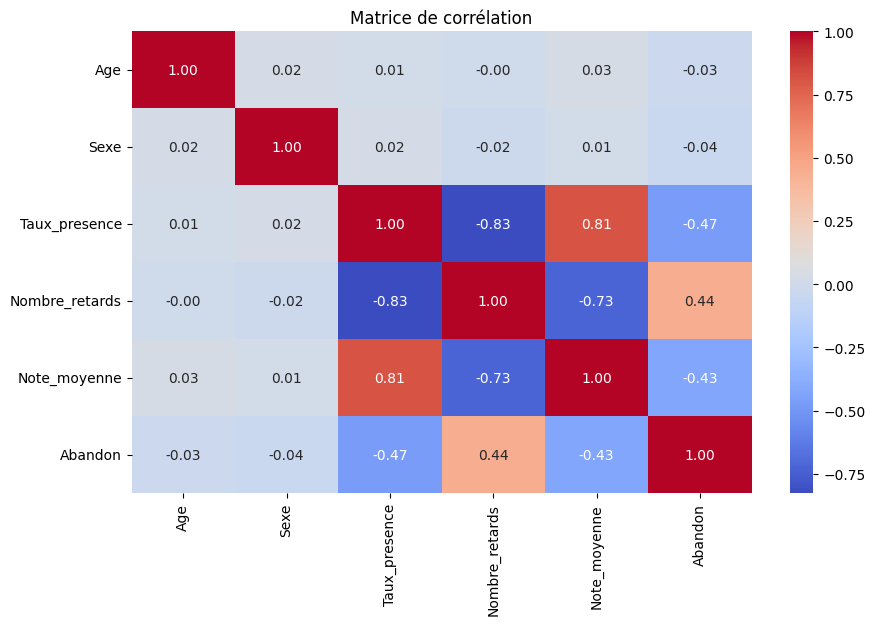

In [250]:
# S√©lection des colonnes d'int√©r√™t
columns_of_interest = ['Age', 'Sexe', 'Taux_presence', 'Nombre_retards', 'Note_moyenne', 'Abandon']

# Calcul de la matrice de corr√©lation
correlation_matrix = df_normalized[columns_of_interest].corr()

# Affichage de la matrice de corr√©lation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corr√©lation")
plt.show()

**Interpr√©tation :**

La variable cible `Abandon` est n√©gativement corr√©l√©e avec le `Taux_presence` (-0.47) et la `Note_moyenne` (-0.43), ce qui signifie qu‚Äôun bon taux de pr√©sence et de bonnes notes r√©duisent le risque d‚Äôabandon. √Ä l‚Äôinverse, le `Nombre_retards` est positivement corr√©l√© √† l‚Äôabandon (0.44) : plus un √©l√®ve accumule de retards, plus il est susceptible d‚Äôabandonner. L‚Äô√¢ge et le sexe n'ont pas de lien significatif avec l‚Äôabandon.


### PCA

In [251]:
from sklearn.decomposition import PCA

In [252]:
# Appliquer PCA pour r√©duire les dimensions
pca = PCA(n_components=10)  
pca_result = pca.fit_transform(df_normalized)

In [253]:
#Analyse de variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

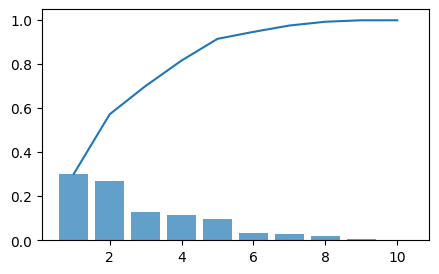

In [254]:
plt.figure(figsize=(5,3))
plt.bar(range(1,len(explained_variance) + 1),explained_variance,alpha=0.7,label='explained_variance')
plt.plot(range(1,len(cumulative_variance) + 1),cumulative_variance, label='cumulative_variance')
plt.show()

**Interpr√©tation :**  

Apr√®s l‚Äôapplication des embeddings, le nombre de colonnes dans notre jeu de donn√©es est pass√© de 7 √† 774. Cette forte augmentation est due √† la vectorisation des variables textuelles en plusieurs dimensions. Afin de r√©duire la dimensionnalit√© tout en conservant l‚Äôessentiel de l‚Äôinformation, nous avons appliqu√© une Analyse en Composantes Principales (ACP). Celle-ci nous permet de ramener le nombre de colonnes √† 8, tout en conservant plus de 90 % de la variance expliqu√©e, c'est-√†-dire l'information pertinente du jeu de donn√©es.


### Mod√©lisation

In [272]:
# Diviser les donn√©es en ensembles d'entra√Ænement et de test
train_x, test_x, train_y, test_y = train_test_split(pca_result[:, :8], 
                                                    df_normalized['Abandon'], 
                                                    test_size=0.2, 
                                                    random_state=42)

In [273]:
print(f"Taille de l'ensemble d'entra√Ænement (train_x): {train_x.shape}")
print(f"Taille de l'ensemble d'entra√Ænement (train_y): {train_y.shape}")
print(f"Taille de l'ensemble de test (test_x): {test_x.shape}")
print(f"Taille de l'ensemble de test (test_y): {test_y.shape}")

Taille de l'ensemble d'entra√Ænement (train_x): (1600, 8)
Taille de l'ensemble d'entra√Ænement (train_y): (1600,)
Taille de l'ensemble de test (test_x): (400, 8)
Taille de l'ensemble de test (test_y): (400,)


In [274]:
train_y.value_counts()

Abandon
0    1462
1     138
Name: count, dtype: int64

In [275]:
test_y.value_counts()

Abandon
0    370
1     30
Name: count, dtype: int64

##### Model - KNN

In [276]:
# D√©finir les param√®tres √† tester
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialiser le mod√®le KNN
knn = KNeighborsClassifier()

# Configurer GridSearchCV avec une m√©trique adapt√©e au d√©s√©quilibre (f1_score)
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='f1', verbose=1)

# Entra√Æner le mod√®le avec GridSearch
grid_search_knn.fit(train_x, train_y)

# Afficher les meilleurs param√®tres et le score
print("Meilleurs param√®tres :", grid_search_knn.best_params_)
print("Meilleur score :", grid_search_knn.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Meilleurs param√®tres : {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Meilleur score : 0.5313958761799293


In [277]:
best_model = grid_search_knn.best_estimator_
y_pred = best_model.predict(test_x)
print("Classification Report:")
print(classification_report(test_y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       370
           1       0.88      0.47      0.61        30

    accuracy                           0.95       400
   macro avg       0.92      0.73      0.79       400
weighted avg       0.95      0.95      0.95       400



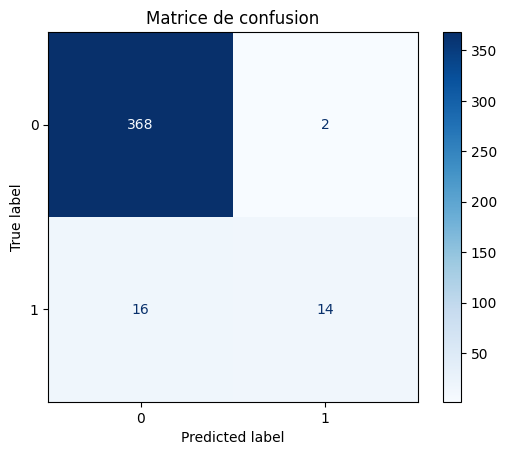

In [278]:
cm = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()

##### Model - Arbre de decision

In [ ]:
# D√©finir les param√®tres √† tester
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

# Initialiser le mod√®le DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Configurer GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='f1', verbose=1)

# Entra√Æner le mod√®le avec GridSearch
grid_search_dt.fit(train_x, train_y)

# Afficher les meilleurs param√®tres et le score
print("Meilleurs param√®tres :", grid_search_dt.best_params_)
print("Meilleur score :", grid_search_dt.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Meilleurs param√®tres : {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Meilleur score : 0.5864966470229628


In [283]:
best_model = grid_search_dt.best_estimator_
y_pred = best_model.predict(test_x)
print("Classification Report:")
print(classification_report(test_y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       370
           1       0.60      0.80      0.69        30

    accuracy                           0.94       400
   macro avg       0.79      0.88      0.83       400
weighted avg       0.95      0.94      0.95       400



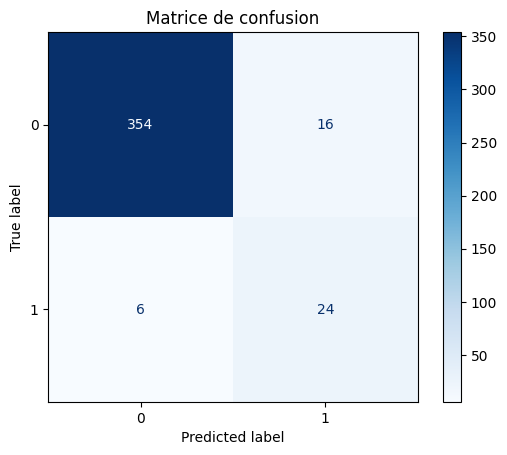

In [284]:
cm = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()

##### Model - RandomForest

In [299]:
# D√©finir les param√®tres √† tester
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

# Initialiser le mod√®le RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Configurer GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='f1', verbose=1)

# Entra√Æner le mod√®le avec GridSearch
grid_search_rf.fit(train_x, train_y)

# Afficher les meilleurs param√®tres et le score
print("Meilleurs param√®tres :", grid_search_rf.best_params_)
print("Meilleur score :", grid_search_rf.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Meilleurs param√®tres : {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Meilleur score : 0.6631200442559468


In [300]:
best_model = grid_search_rf.best_estimator_
y_pred = best_model.predict(test_x)
print("Classification Report:")
print(classification_report(test_y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       370
           1       0.82      0.77      0.79        30

    accuracy                           0.97       400
   macro avg       0.90      0.88      0.89       400
weighted avg       0.97      0.97      0.97       400



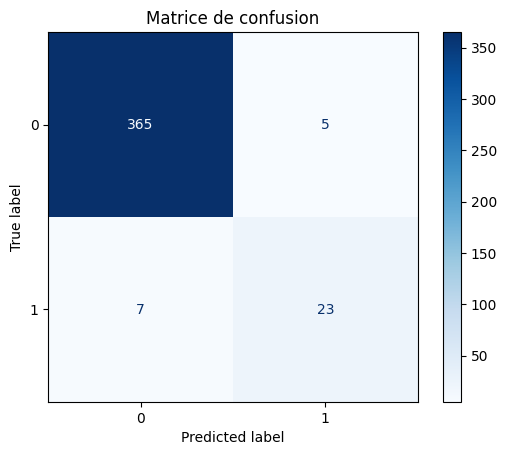

In [287]:
cm = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()

#### Model - Regression logistique

In [ ]:
# D√©finir les param√®tres √† tester
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['saga'],  # 'saga' supporte l1, l2 et elasticnet
    'class_weight': ['balanced'],
    'l1_ratio': [0.1, 0.5, 0.9]  # Utilis√© uniquement pour elasticnet
}

# Initialiser le mod√®le LogisticRegression
lr = LogisticRegression(max_iter=1000, random_state=42)

# Configurer GridSearchCV
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='f1', verbose=1)

# Entra√Æner le mod√®le avec GridSearch
grid_search_lr.fit(train_x, train_y)

# Afficher les meilleurs param√®tres et le score
print("Meilleurs param√®tres :", grid_search_lr.best_params_)
print("Meilleur score :", grid_search_lr.best_score_)

In [289]:
best_model = grid_search_lr.best_estimator_
y_pred = best_model.predict(test_x)
print("Classification Report:")
print(classification_report(test_y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       370
           1       0.45      0.97      0.61        30

    accuracy                           0.91       400
   macro avg       0.72      0.93      0.78       400
weighted avg       0.96      0.91      0.92       400



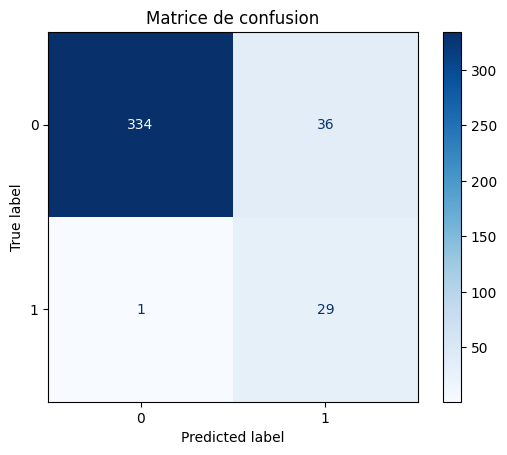

In [290]:
cm = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()

Essayons different threeshold

In [291]:
# Obtenir les probabilit√©s pr√©dites pour la classe positive
y_prob = best_model.predict_proba(test_x)[:, 1]

# Tester diff√©rents seuils
thresholds = [i * 0.1 for i in range(1, 10)]
best_threshold = 0
best_f1 = 0

for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    f1 = f1_score(test_y, y_pred_threshold)
    print(f"Seuil: {threshold:.1f}, F1-score: {f1:.4f}")
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"\nMeilleur seuil: {best_threshold:.1f} avec un F1-score de {best_f1:.4f}")

Seuil: 0.1, F1-score: 0.2985
Seuil: 0.2, F1-score: 0.3797
Seuil: 0.3, F1-score: 0.4394
Seuil: 0.4, F1-score: 0.5273
Seuil: 0.5, F1-score: 0.6105
Seuil: 0.6, F1-score: 0.6914
Seuil: 0.7, F1-score: 0.7027
Seuil: 0.8, F1-score: 0.6557
Seuil: 0.9, F1-score: 0.5778

Meilleur seuil: 0.7 avec un F1-score de 0.7027


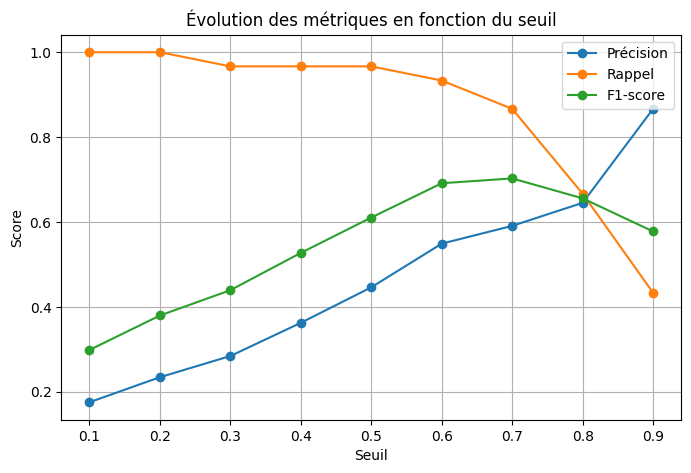

In [292]:
# Tester diff√©rents seuils
thresholds = [i * 0.1 for i in range(1, 10)]
precision_scores = []
recall_scores = []
f1_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    precision_scores.append(precision_score(test_y, y_pred_threshold))
    recall_scores.append(recall_score(test_y, y_pred_threshold))
    f1_scores.append(f1_score(test_y, y_pred_threshold))

# Afficher les r√©sultats sur un graphe
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision_scores, label='Pr√©cision', marker='o')
plt.plot(thresholds, recall_scores, label='Rappel', marker='o')
plt.plot(thresholds, f1_scores, label='F1-score', marker='o')
plt.title("√âvolution des m√©triques en fonction du seuil")
plt.xlabel("Seuil")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()

**Interpr√©tation :**  

L'analyse de l'√©volution des m√©triques en fonction du seuil de d√©cision montre que le compromis optimal entre **pr√©cision** et **rappel** est atteint autour d'un **seuil de 0.7**. √Ä ce seuil, le **F1-score** est maximal, traduisant un bon √©quilibre entre la capacit√© du mod√®le √† d√©tecter les abandons et √† limiter les fausses alertes.  


In [293]:
threshold = 0.7
y_pred_threshold = (y_prob >= threshold).astype(int)
print("Classification Report:")
print(classification_report(test_y, y_pred_threshold))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       370
           1       0.59      0.87      0.70        30

    accuracy                           0.94       400
   macro avg       0.79      0.91      0.84       400
weighted avg       0.96      0.94      0.95       400



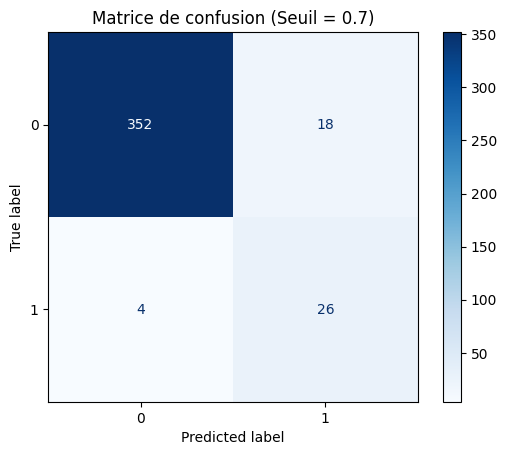

In [294]:
# Recalculer les pr√©dictions avec un seuil de 0.7
threshold = 0.7
y_pred_threshold = (y_prob >= threshold).astype(int)

# Calculer et afficher la matrice de confusion
cm = confusion_matrix(test_y, y_pred_threshold)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Matrice de confusion (Seuil = {threshold})")
plt.show()

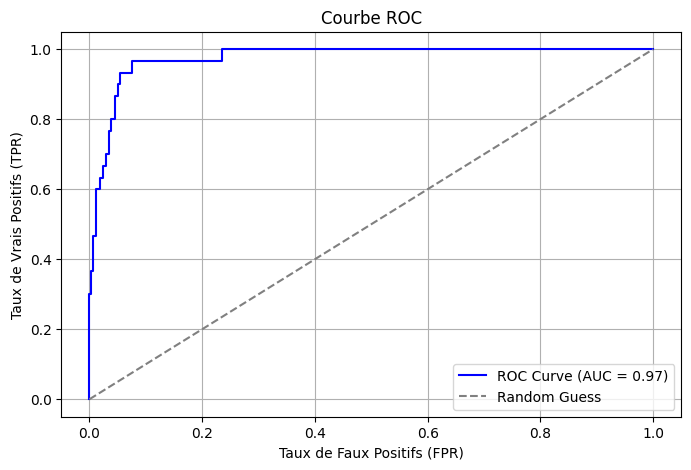

In [295]:
# Calculer les scores ROC
fpr, tpr, thresholds_roc = roc_curve(test_y, y_prob)
roc_auc = roc_auc_score(test_y, y_prob)

# Tracer la courbe ROC
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
plt.title("Courbe ROC")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.legend()
plt.grid()
plt.show()

#### Model - Xgboost

In [ ]:
# D√©finir les param√®tres √† tester
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 2, 5]  # Pour g√©rer le d√©s√©quilibre des classes
}

# Initialiser le mod√®le XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Configurer GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='f1', verbose=1)

# Entra√Æner le mod√®le avec GridSearch
grid_search_xgb.fit(train_x, train_y)

# Afficher les meilleurs param√®tres et le score
print("Meilleurs param√®tres :", grid_search_xgb.best_params_)
print("Meilleur score :", grid_search_xgb.best_score_)

In [297]:
best_model = grid_search_xgb.best_estimator_
y_pred = best_model.predict(test_x)
print("Classification Report:")
print(classification_report(test_y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       370
           1       0.80      0.93      0.86        30

    accuracy                           0.98       400
   macro avg       0.90      0.96      0.92       400
weighted avg       0.98      0.98      0.98       400



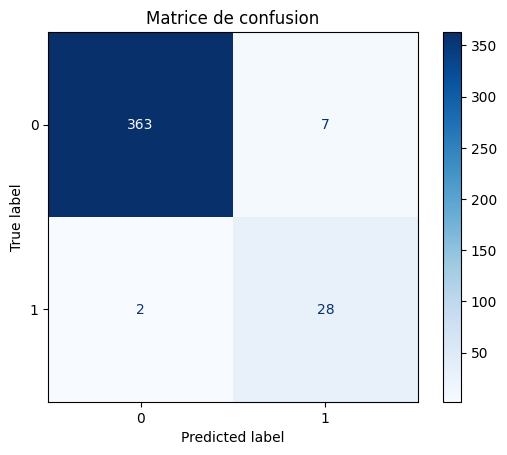

In [298]:
cm = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()

## üìä Benchmark et Interpr√©tation des Mod√®les (8 Composantes Principales)

Apr√®s r√©duction dimensionnelle en conservant **8 composantes principales**, voici les performances obtenues pour chaque mod√®le :

| Mod√®le                       | Pr√©cision (classe 1) | Rappel (classe 1) | F1-score (classe 1) | Accuracy |
|:----------------------------|:--------------------|:-----------------|:--------------------|:----------|
| **KNN**                      | 0.88                 | 0.47              | 0.61                 | 0.95      |
| **Arbre de D√©cision**        | 0.60                 | 0.80              | 0.69                 | 0.94      |
| **Random Forest**            | 0.82                 | 0.77              | 0.79                 | 0.97      |
| **R√©gression Logistique (0.7)** | 0.59              | 0.87              | 0.70                 | 0.94      |
| **XGBoost**                  | **0.80**             | **0.93**          | **0.86**             | **0.98**  |

> üìå **Remarque :** Les valeurs de pr√©cision, rappel et F1-score concernent ici sp√©cifiquement la **classe positive (1)**.

---

### üìå Interpr√©tation des R√©sultats

- **XGBoost** se d√©marque nettement comme **le meilleur mod√®le** :
  - Pr√©cision √©lev√©e (**0.80**) et excellent rappel (**0.93**).
  - F1-score √©quilibr√© (**0.86**) et **accuracy globale de 98%**.
  - Id√©al pour maximiser √† la fois la d√©tection des cas positifs et la r√©duction des faux positifs.

- **Random Forest** arrive en deuxi√®me position :
  - Bonne pr√©cision (**0.82**) et rappel satisfaisant (**0.77**).
  - F1-score √† **0.79** et accuracy de **97%**.

- **R√©gression Logistique (seuil ajust√© √† 0.7)** :
  - Rappel √©lev√© (**0.87**), int√©ressant pour d√©tecter un maximum de cas positifs.
  - Pr√©cision plus faible (**0.59**), ce qui augmente le nombre de faux positifs.
  - F1-score de **0.70**.

- **Arbre de D√©cision** :
  - Bon rappel (**0.80**) mais pr√©cision limit√©e (**0.60**).
  - F1-score de **0.69**, performance correcte mais en retrait.

- **KNN** :
  - Meilleure pr√©cision (**0.88**), mais rappel tr√®s faible (**0.47**), ce qui le rend moins fiable pour d√©tecter efficacement la classe 1.
  - F1-score de **0.61**, le plus faible du benchmark.

---

### ‚úÖ Conclusion

- **XGBoost** est le mod√®le √† privil√©gier dans ce contexte, offrant le meilleur √©quilibre entre pr√©cision et rappel pour la d√©tection de la classe positive.
- **Random Forest** constitue une alternative int√©ressante avec des performances globales solides.
- **R√©gression Logistique** reste acceptable, notamment pour maximiser le rappel apr√®s ajustement du seuil.
- Les mod√®les **KNN** et **Arbre de D√©cision** montrent des performances plus limit√©es et sont moins adapt√©s √† ce probl√®me.

---

üìå **Remarque personnelle :**

En testant mes mod√®les avec **9 composantes principales**, j‚Äôai constat√© qu'ils atteignaient tous des scores parfaits (100%) sur l‚Äôensemble des m√©triques (pr√©cision, rappel, f1-score, etc.) sur les donn√©es de test. Apr√®s analyse, j‚Äôexplique ce ph√©nom√®ne par deux raisons principales :

1. **Les 9 premi√®res composantes semblent capturer l‚Äôint√©gralit√© de l‚Äôinformation discriminante pr√©sente dans le dataset.** Autrement dit, elles r√©sument toute la variance utile pour diff√©rencier les classes. Cela rend la s√©paration dans l‚Äôespace r√©duit tr√®s simple pour les algorithmes.

2. **Le dataset semble √™tre soit tr√®s structur√©, soit naturellement bien s√©par√©** (lin√©airement ou quasi-lin√©airement) apr√®s r√©duction. En projetant les donn√©es sur ces 9 composantes, la fronti√®re de d√©cision devient quasi triviale pour tous les mod√®les, d‚Äôo√π ces performances parfaites.
